## Madoria-EDA
### Importing the Data and starting the EDA process

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, classification_report
#from shapely.geometry import Point, Polygon
#import geopandas as gpd

In [3]:
testing = pd.read_csv('data/Test data.csv')
training = pd.read_csv('data/Training data.csv')
target = pd.read_csv('data/Training data target.csv')

In [4]:
testing.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2/4/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other


In [5]:
training.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
target.head(1)

,id,status_group
0,69572,functional


We decided to split the dataset in the beginning and we all did a basic analysis on our own columns.\
Here I begin analyzing the columns that I was assigned:

In [7]:
df= training[['basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   basin           59400 non-null  object
 1   subvillage      59029 non-null  object
 2   region          59400 non-null  object
 3   region_code     59400 non-null  int64 
 4   district_code   59400 non-null  int64 
 5   lga             59400 non-null  object
 6   ward            59400 non-null  object
 7   population      59400 non-null  int64 
 8   public_meeting  56066 non-null  object
 9   recorded_by     59400 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.5+ MB


<AxesSubplot:xlabel='basin', ylabel='count'>

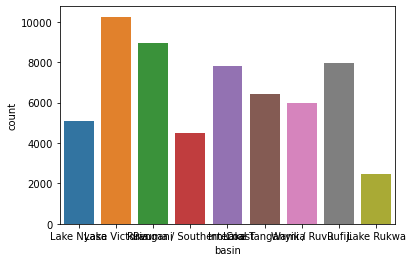

In [8]:
df['basin'].value_counts()
sns.countplot(x=df['basin'])

<AxesSubplot:xlabel='subvillage', ylabel='population'>

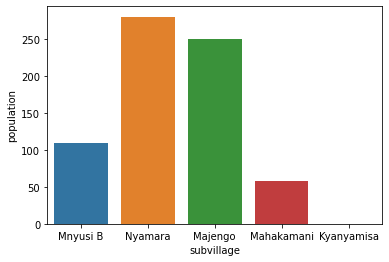

In [9]:
df['subvillage'].value_counts()
sns.barplot(x=df['subvillage'][:5], y=df['population'])

C:\Users\deaud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population', ylabel='region'>

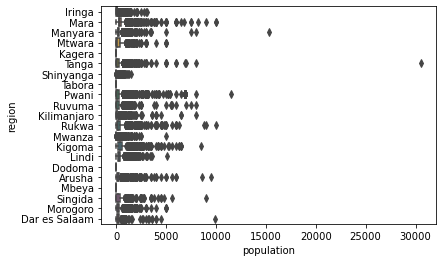

In [10]:
df['region'].value_counts()
sns.boxplot(df['population'], df['region'])

<AxesSubplot:xlabel='region_code', ylabel='count'>

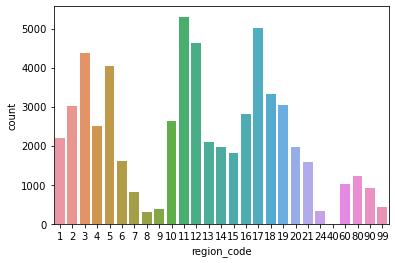

In [11]:
df['region_code'].value_counts()
sns.countplot(x=df['region_code'])

<AxesSubplot:xlabel='district_code', ylabel='count'>

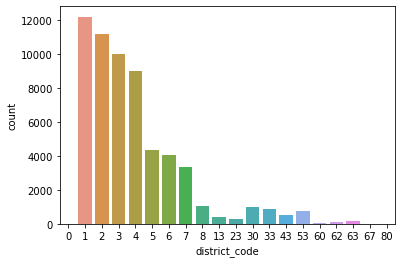

In [12]:
df['district_code'].value_counts()
sns.countplot(x=df['district_code'])

C:\Users\deaud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population', ylabel='lga'>

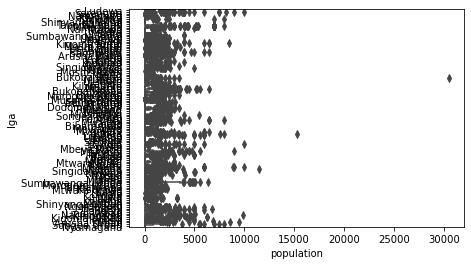

In [13]:
#Yikes
sns.boxplot(df['population'], df['lga'])

In [14]:
df['ward'].value_counts()

Igosi              307
Imalinyi           252
Siha Kati          232
Mdandu             231
Nduruma            217
                  ... 
Uchindile            1
Thawi                1
Uwanja wa Ndege      1
Izia                 1
Kinungu              1
Name: ward, Length: 2092, dtype: int64

In [15]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: population, Length: 1049, dtype: int64

<AxesSubplot:xlabel='public_meeting', ylabel='count'>

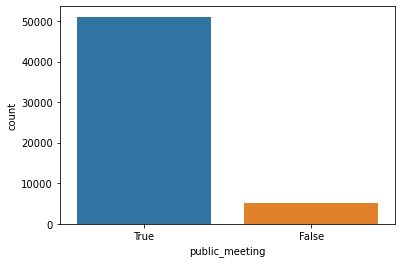

In [16]:
df['public_meeting'].value_counts()
sns.countplot(x=df['public_meeting'])

<AxesSubplot:xlabel='recorded_by', ylabel='count'>

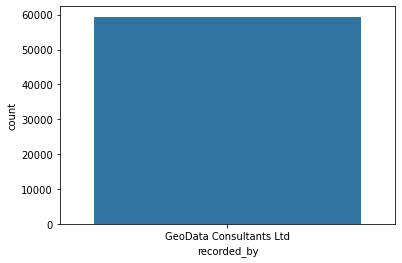

In [17]:
df['recorded_by'].value_counts()
sns.countplot(x=df['recorded_by'])

Now moving on to adding at least one map visual.

In [18]:
df2 = pd.concat([training, target], axis=1)

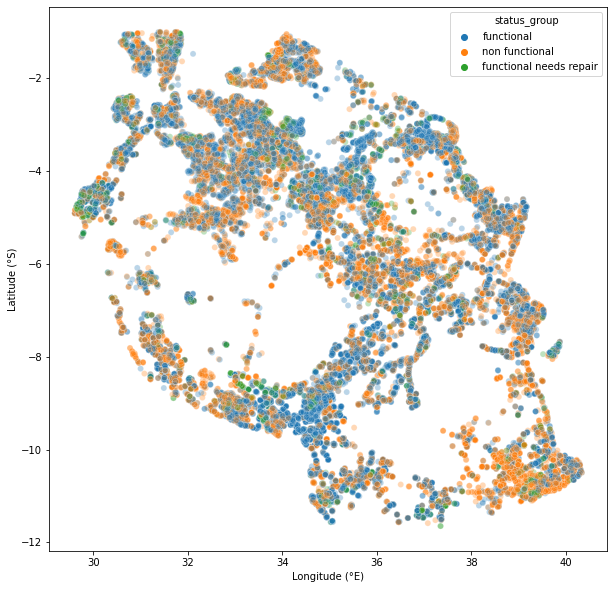

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
df3 = df2[df2['latitude'] != 0]
df4 = df3[df3['longitude'] != 0]
sns.scatterplot(x = df4['longitude'], y = df4['latitude'], hue = df4['status_group'],
                marker='o', alpha=0.3)
plt.xlabel('Longitude (°E)', fontsize=10)
plt.ylabel('Latitude (°S)', fontsize=10);
#plt.savefig('status_map3.png', transparent=True);

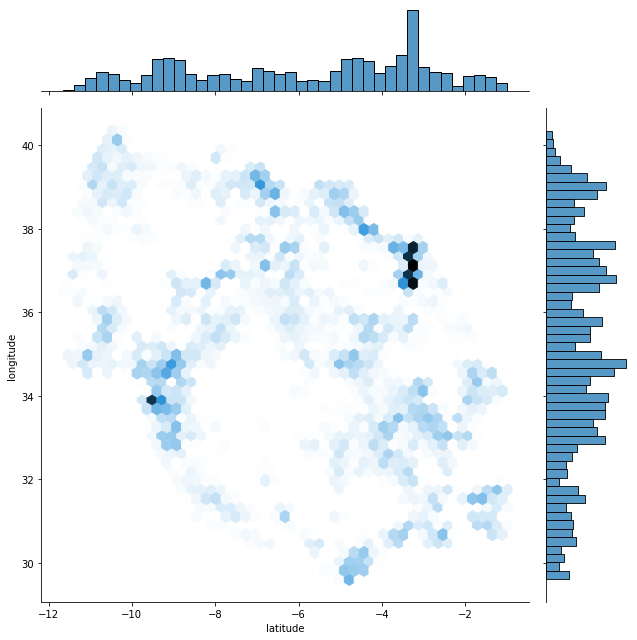

In [38]:
sns.jointplot(data=df4, x="latitude", y="longitude", kind="hex", height=9);

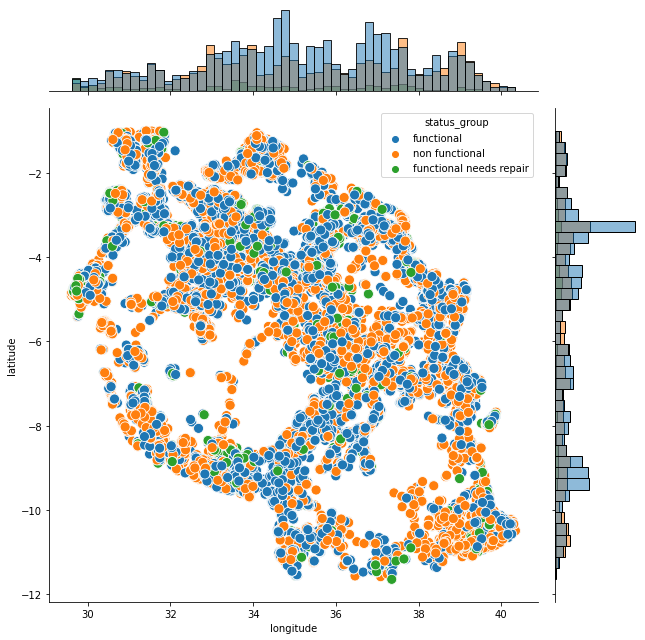

In [21]:
g = sns.JointGrid(data=df4, x="longitude", y="latitude", hue="status_group", height=9)
g.plot_joint(sns.scatterplot, s=100)
g.plot_marginals(sns.histplot);

In [22]:
df2.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,id
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,37115.131768
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,21453.128371
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,18519.750000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,37061.500000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,55656.500000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,74247.000000


Now on to splitting and cleaning the data for modeling.

In [23]:
train_clean = pd.read_csv('data/data_clean.csv')

In [24]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              59400 non-null  int64  
 1   funder                  59400 non-null  object 
 2   gps_height              59400 non-null  int64  
 3   installer               59400 non-null  object 
 4   wpt_name                59400 non-null  object 
 5   basin                   59400 non-null  object 
 6   region_code             59400 non-null  int64  
 7   district_code           59400 non-null  int64  
 8   population              59400 non-null  int64  
 9   public_meeting          56066 non-null  float64
 10  permit                  56344 non-null  float64
 11  extraction_type_class   59400 non-null  object 
 12  management              59400 non-null  object 
 13  payment_type            59400 non-null  object 
 14  quality_group           59400 non-null

#### Some Inferential Graphs to Look at 

C:\Users\deaud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


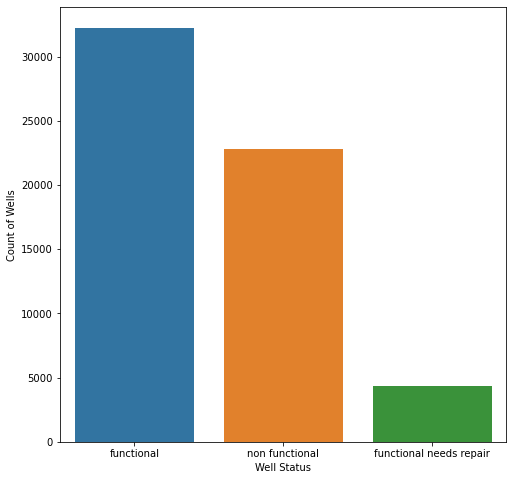

In [39]:
plt.figure(figsize=(8, 8))
sns.countplot(train_clean['status_group'])
plt.xlabel('Well Status', fontsize=10)
plt.ylabel('Count of Wells', fontsize=10);

<AxesSubplot:xlabel='management', ylabel='count'>

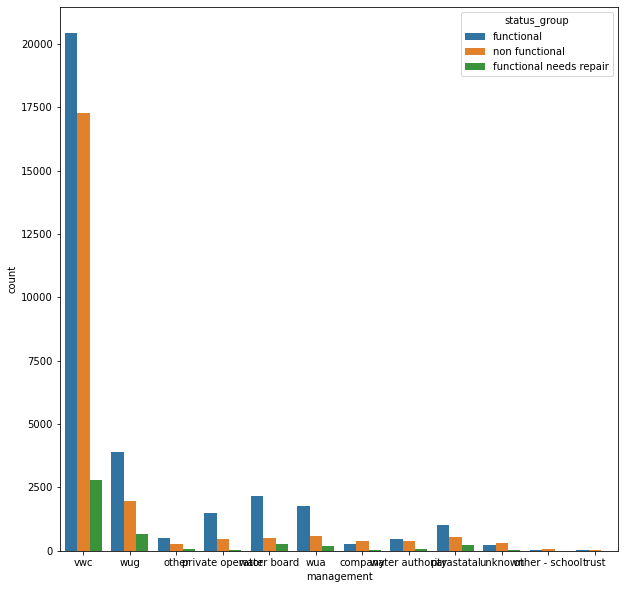

In [26]:
plt.figure(figsize=(10, 10))
sns.countplot(x=train_clean['management'], hue=train_clean['status_group'])

In [27]:
train_clean.groupby("region_code")["status_group"].value_counts().sort_values(ascending=False).loc[: , ['non functional']]

region_code  status_group  
12           non functional    1816
5            non functional    1593
17           non functional    1566
3            non functional    1417
19           non functional    1401
18           non functional    1291
14           non functional    1070
11           non functional    1034
4            non functional    1032
20           non functional    1023
10           non functional     996
1            non functional     983
15           non functional     966
13           non functional     954
2            non functional     872
16           non functional     850
80           non functional     728
90           non functional     625
6            non functional     527
60           non functional     515
21           non functional     500
7            non functional     341
8            non functional     259
9            non functional     230
99           non functional     225
24           non functional       9
40           non functional       1


In [28]:
train_clean["well_count"] = 1 

In [29]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              59400 non-null  int64  
 1   funder                  59400 non-null  object 
 2   gps_height              59400 non-null  int64  
 3   installer               59400 non-null  object 
 4   wpt_name                59400 non-null  object 
 5   basin                   59400 non-null  object 
 6   region_code             59400 non-null  int64  
 7   district_code           59400 non-null  int64  
 8   population              59400 non-null  int64  
 9   public_meeting          56066 non-null  float64
 10  permit                  56344 non-null  float64
 11  extraction_type_class   59400 non-null  object 
 12  management              59400 non-null  object 
 13  payment_type            59400 non-null  object 
 14  quality_group           59400 non-null

In [30]:
pivot = train_clean[['status_group', 'construction_year_bins', 'management', 'well_count']]

In [31]:
pivoted_df = pd.pivot_table(pivot, index=['management', 'construction_year_bins'],
                            columns='status_group', aggfunc='count')
   # calculating percentage                     
pivoted_df.loc[['vwc'], :]

well_count                          \
status_group                      functional functional needs repair   
management construction_year_bins                                      
vwc        (1960.0, 1970.0]            176.0                    39.0   
           (1970.0, 1980.0]           1115.0                   261.0   
           (1980.0, 1990.0]           8655.0                  1411.0   
           (1990.0, 2000.0]           3279.0                   404.0   
           (2000.0, 2010.0]           6332.0                   585.0   
           (2010.0, 2013.0]            856.0                    87.0   

                                                  
status_group                      non functional  
management construction_year_bins                 
vwc        (1960.0, 1970.0]                479.0  
           (1970.0, 1980.0]               2246.0  
           (1980.0, 1990.0]               8671.0  
           (1990.0, 2000.0]               2302.0  
           (2000.0, 2010.0]               3089.0  
           (2010.0, 2013.0]                441.0

In [32]:
pd.crosstab([train_clean.management, train_clean.construction_year_bins], columns=train_clean.status_group\
    , normalize='index').loc[['vwc'], :].applymap(lambda x: "{0:.0f}%".format(100*x))

status_group                      functional functional needs repair  \
management construction_year_bins                                      
vwc        (1960.0, 1970.0]              25%                      6%   
           (1970.0, 1980.0]              31%                      7%   
           (1980.0, 1990.0]              46%                      8%   
           (1990.0, 2000.0]              55%                      7%   
           (2000.0, 2010.0]              63%                      6%   
           (2010.0, 2013.0]              62%                      6%   

status_group                      non functional  
management construction_year_bins                 
vwc        (1960.0, 1970.0]                  69%  
           (1970.0, 1980.0]                  62%  
           (1980.0, 1990.0]                  46%  
           (1990.0, 2000.0]                  38%  
           (2000.0, 2010.0]                  31%  
           (2010.0, 2013.0]                  32%

<AxesSubplot:xlabel='None-status_group', ylabel='management-construction_year_bins'>

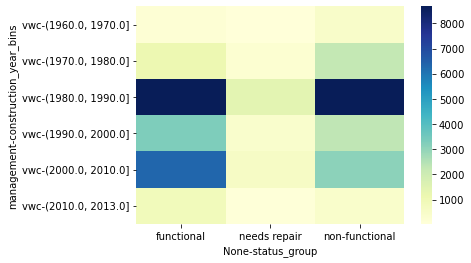

In [33]:
sns.heatmap(pivoted_df.loc[['vwc'], :], xticklabels= ['functional', 'needs repair', 'non-functional'], cmap='YlGnBu')

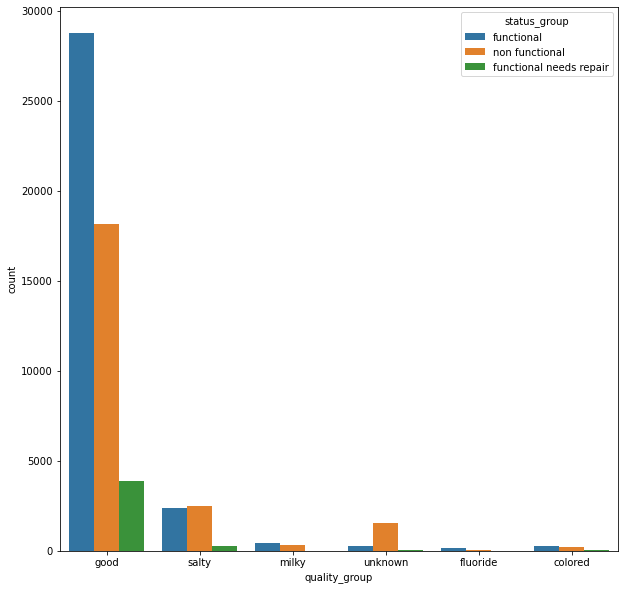

In [262]:
plt.figure(figsize=(10, 10))
sns.countplot(x=train_clean['quality_group'], hue=train_clean['status_group']);

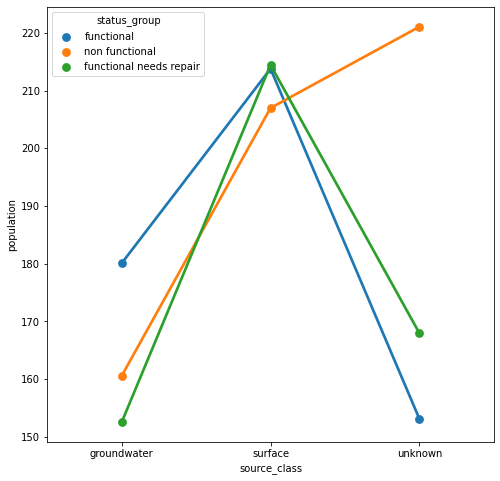

In [177]:
plt.figure(figsize=(8, 8))
sns.pointplot(x=train_clean['source_class'], y=train_clean['population'], hue=train_clean['status_group'], ci=None);

In [154]:
# from pandas import pivot_table
piv_df= train_clean[['extraction_type_class','status_group', 'region_code']]
piv_table = piv_df.pivot_table(index='extraction_type_class',
                           columns='status_group', aggfunc='count')
piv_table

region_code                                       
status_group           functional functional needs repair non functional
extraction_type_class                                                   
gravity                     16048                    2701           8031
handpump                    10375                     995           5086
motorpump                    1135                     138           1714
other                        1029                     206           5195
rope pump                     293                      17            141
submersible                  3329                     253           2597
wind-powered                   50                       7             60

<AxesSubplot:xlabel='None-status_group', ylabel='extraction_type_class'>

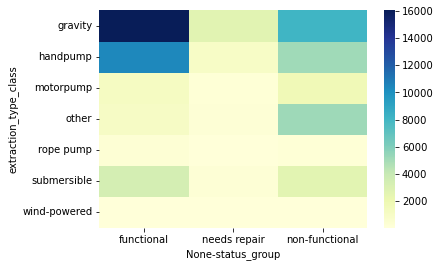

In [155]:
sns.heatmap(piv_table, xticklabels= ['functional', 'needs repair', 'non-functional'], cmap='YlGnBu')

In [152]:
piv_df= train_clean[['waterpoint_type','status_group', 'region_code']]
piv_table2 = piv_df.pivot_table(index='waterpoint_type',
                           columns='status_group', aggfunc='count')
piv_table2

region_code                                       
status_group                 functional functional needs repair non functional
waterpoint_type                                                               
cattle trough                      84.0                     2.0           30.0
communal standpipe              17726.0                  2260.0         8536.0
communal standpipe multiple      2235.0                   648.0         3220.0
dam                                 6.0                     NaN            1.0
hand pump                       10805.0                  1029.0         5654.0
improved spring                   563.0                    85.0          136.0
other                             840.0                   293.0         5247.0

<AxesSubplot:xlabel='None-status_group', ylabel='waterpoint_type'>

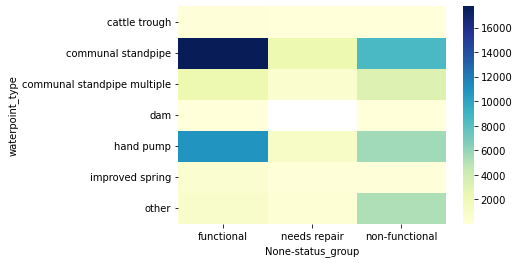

In [153]:
sns.heatmap(piv_table2, xticklabels= ['functional', 'needs repair', 'non-functional'], cmap='YlGnBu')

In [166]:
piv_df= train_clean[['quantity','status_group', 'region_code']]
piv_table3 = piv_df.pivot_table(index='quantity',
                           columns='status_group', aggfunc='count')
piv_table3

region_code                                       
status_group  functional functional needs repair non functional
quantity                                                       
dry                  157                      37           6052
enough             21648                    2400           9138
insufficient        7916                    1450           5763
seasonal            2325                     416           1309
unknown              213                      14            562

<AxesSubplot:xlabel='None-status_group', ylabel='quantity'>

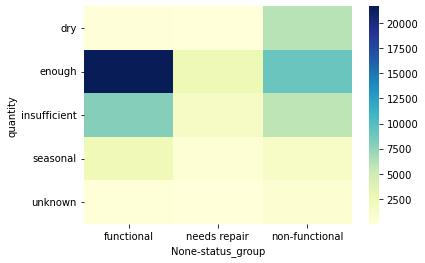

In [168]:
sns.heatmap(piv_table3, xticklabels= ['functional', 'needs repair', 'non-functional'], cmap='YlGnBu')

#### Begin the Train-Test-Split

In [35]:
train_clean['district_code']= train_clean['district_code'].astype(str)
train_clean['region_code']= train_clean['region_code'].astype(str)

In [36]:
X = train_clean.drop(columns=['Unnamed: 0', 'status_group'], axis= 1)
y = train_clean['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=500)

In [37]:
# Transformer requires Index type
categorical_columns= X.select_dtypes(include= 'object').columns
numeric_columns= X.select_dtypes(exclude= 'object').columns

In [38]:
categorical_columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'region_code',
       'district_code', 'extraction_type_class', 'management', 'payment_type',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type', 'construction_year_bins'],
      dtype='object')

In [39]:
numeric_columns

Index(['gps_height', 'population', 'public_meeting', 'permit'], dtype='object')

In [40]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median", add_indicator=True)), ("scaler", StandardScaler())])

categorical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(handle_unknown='ignore'))])

#target_transformer = LabelEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, ['gps_height', 'population', 'public_meeting', 'permit']),
        ("cat", categorical_transformer, ['funder', 'installer', 'wpt_name', 'basin', 'region_code',
       'district_code', 'extraction_type_class', 'management', 'payment_type',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type', 'construction_year_bins'])])

### Baseline: Dummy Classifier

First, we'll run this dummy classifier as our Baseline model. Let's see how well we do against pure chance. 

In [41]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)

0.5441558441558442

In [42]:
dummy.score(X_test, y_test)

0.5405723905723906

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


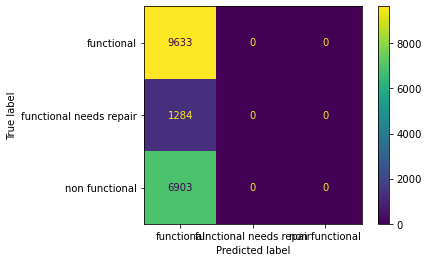

In [43]:
plot_confusion_matrix(dummy, X_test, y_test);

### Logistic Regression

Now moving on to the real model that I plan to use in my analysis. 

In [44]:
logreg_model = Pipeline(steps=[('clean', preprocessor), ('logreg', LogisticRegression(max_iter=500))])

logreg_model.fit(X_train, y_train)

logreg_model.score(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7453823953823954

In [45]:
logreg_model.score(X_test, y_test)

0.7450617283950617

In [46]:
logreg_hat = logreg_model.predict(X_test)

In [47]:
print(f"""
Our first model's accuracy on the test set is {round(accuracy_score(y_test, logreg_hat), 2)}. \n
Our first model's recall on the test set is {round(recall_score(y_test, logreg_hat, average='weighted'), 2)} \n
Our first model's precision on the test set is {round(precision_score(y_test, logreg_hat, average='weighted'), 2)} \n
Our first model's f1-score on the test is {round(f1_score(y_test, logreg_hat, average='weighted'), 2)}.
""")


Our first model's accuracy on the test set is 0.75. 

Our first model's recall on the test set is 0.75 

Our first model's precision on the test set is 0.74 

Our first model's f1-score on the test is 0.72.



C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


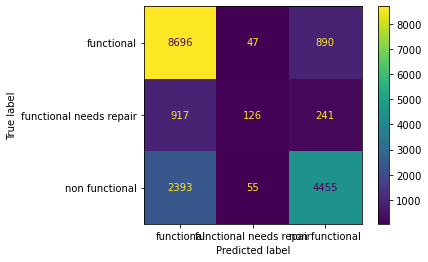

In [102]:
plot_confusion_matrix(logreg_model, X_test, y_test);

### GridSearchCV

Here I'm going to try different iterations of the GridSearchCV. I'm searching each parameter one by one for a good fit, and then hoping to combine them all at the end. Hopefully, I will have a decent end result.

In [103]:
parameters = {'logreg__C': [0.01, 0.80, 0.90, 1.0],
              'logreg__max_iter': [500]}

gs = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

gs.fit(X_train, y_train)

In [ ]:
parameters = {'logreg__class_weight': ['balanced', None],
              'logreg__max_iter': [500]}

gs2 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

gs2.fit(X_train, y_train)

In [ ]:
parameters = {'logreg__penalty': ['elasticnet'],
              'logreg__solver': ['saga'],
              'logreg__l1_ratio': [0.0, 0.10, 0.25],
              'logreg__max_iter': [500]}

gs3 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

gs3.fit(X_train, y_train)

In [ ]:
parameters = {'logreg__penalty': ['l1'],
              'logreg__solver': ['saga'],
              'logreg__max_iter': [500]}

gs4 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

gs4.fit(X_train, y_train)

In [ ]:
parameters = {'logreg__penalty': ['none'],
              'logreg__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'logreg__max_iter': [500]}

gs5 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

gs5.fit(X_train, y_train)

In [ ]:
parameters = {'logreg__penalty': ['l2'],
              'logreg__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'logreg__max_iter': [500]}

gs6 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

gs6.fit(X_train, y_train)

In [ ]:
##Comparing all the best parameters and cv score results for each model.
#Choosing the best of each is the most important to fit into the final model
print(f"""
First Gridsearch: {gs.best_params_, gs.cv_results_['mean_test_score']} \n
Second Gridsearch: {gs2.best_params_, gs2.cv_results_['mean_test_score']} \n
Third Gridsearch: {gs3.best_params_, gs3.cv_results_['mean_test_score']} \n
Fourth Gridsearch: {gs4.best_params_, gs4.cv_results_['mean_test_score']} \n
Fifth Gridsearch: {gs5.best_params_, gs5.cv_results_['mean_test_score']} \n
Sixth Gridsearch: {gs6.best_params_, gs6.cv_results_['mean_test_score']}.
""")


First Gridsearch: ({'logreg__C': 1.0, 'logreg__max_iter': 500}, array([0.73686869, 0.74314574, 0.74309764, 0.74316979])) 

Second Gridsearch: ({'logreg__class_weight': None, 'logreg__max_iter': 500}, array([0.63773449, 0.74316979])) 

Third Gridsearch: ({'logreg__l1_ratio': 0.1, 'logreg__max_iter': 500, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}, array([0.74321789, 0.74321789, 0.74321789])) 

Fourth Gridsearch: ({'logreg__max_iter': 500, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}, array([0.74316979])) 

Fifth Gridsearch: ({'logreg__max_iter': 500, 'logreg__penalty': 'none', 'logreg__solver': 'saga'}, array([0.74314574, 0.74312169, 0.74312169, 0.74319384])) 

Sixth Gridsearch: ({'logreg__max_iter': 500, 'logreg__penalty': 'l2', 'logreg__solver': 'sag'}, array([0.74316979, 0.74316979, 0.74324194, 0.74321789])).



Now that that's over, I'm ready to combine it all now. 

In [ ]:
gs_model = Pipeline(steps=[('clean', preprocessor), ('logreg', LogisticRegression(penalty= 'l2'\
    , solver= 'sag', C= 1.0, class_weight= None, max_iter= 500, random_state=500))])

gs_model.fit(X_train, y_train)

gs_model.score(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7454304954304954

In [ ]:
gs_model.score(X_test, y_test)

0.7449494949494949

In [ ]:
gs_log_hat = gs_model.predict(X_test)

In [ ]:
print(f"""
Our gridsearched model's accuracy on the test set is {round(accuracy_score(y_test, gs_log_hat), 2)}. 
Our gridsearched model's recall on the test set is {round(recall_score(y_test, gs_log_hat, average='macro'), 2)} \n
Our gridsearched model's precision on the test set is {round(precision_score(y_test, gs_log_hat, average='macro'), 2)} \n
Our gridsearched model's f1-score on the test is {round(f1_score(y_test, gs_log_hat, average='macro'), 2)}.
""")


Our gridsearched model's accuracy on the test set is 0.74. 
Our gridsearched model's recall on the test set is 0.55 

Our gridsearched model's precision on the test set is 0.69 

Our gridsearched model's f1-score on the test is 0.56.



C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


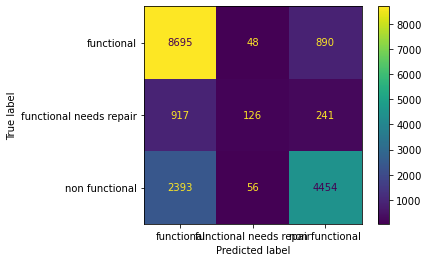

In [ ]:
plot_confusion_matrix(gs_model, X_test, y_test);

### SMOTE

I did notice the target for this dataset is imbalanced. A possible remedy for this is the SMOTE which I shall try here. Fingers crossed

In [48]:
smote_pipe = ImPipeline(steps=[('clean', preprocessor),
                               ('sm', SMOTE()),
                               ('logreg', LogisticRegression())])


smote_pipe.fit(X_train, y_train)

In [50]:
smote_pipe.score(X_train, y_train)

0.6432659932659933

In [51]:
smote_pipe.score(X_test, y_test)

0.6385521885521885

In [52]:
smote_hat = smote_pipe.predict(X_test)

In [55]:
print(f"""
Our SMOTE model's accuracy on the test set is {round(accuracy_score(y_test, smote_hat), 2)}. \n
Our SMOTE model's recall on the test set is {round(recall_score(y_test, smote_hat, average='weighted'), 2)} \n
Our SMOTE model's precision on the test set is {round(precision_score(y_test, smote_hat, average='weighted'), 2)} \n
Our SMOTE model's f1-score on the test is {round(f1_score(y_test, smote_hat, average='weighted'), 2)}.
""")


Our SMOTE model's accuracy on the test set is 0.64. 

Our SMOTE model's recall on the test set is 0.64 

Our SMOTE model's precision on the test set is 0.74 

Our SMOTE model's f1-score on the test is 0.67.



C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


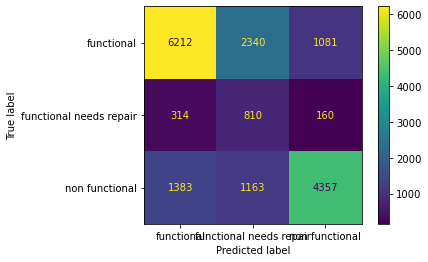

In [54]:
plot_confusion_matrix(smote_pipe, X_test, y_test);

### GridSearch with SMOTE

Now I'm going to try another GridSearch with my SMOTE train data. This will lead to my final result. 

In [208]:
#The first C range I ran was [0.001, 0.01, 0.1, 1, 10, 100] and then I decided to rerun again with higher numbers.
# I almost ran it again and then stopped it  
parameters = {'logreg__C': [100, 500, 1000],
              'logreg__max_iter': [500]}

gs_smote = GridSearchCV(estimator=smote_pipe,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

gs_smote.fit(X_train, y_train)

NameError: name 'smote_pipe' is not defined

In [ ]:
parameters = {'logreg__class_weight': ['balanced', None],
              'logreg__max_iter': [500]}

gs_smote2 = GridSearchCV(estimator=smote_pipe,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

gs_smote2.fit(X_train, y_train)

In [ ]:
parameters = {'logreg__penalty': ['elasticnet'],
              'logreg__solver': ['saga'],
              'logreg__l1_ratio': [0.0, 0.10, 0.25],
              'logreg__max_iter': [500]}

gs_smote3 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

gs_smote3.fit(X_train, y_train)

In [ ]:
parameters = {'logreg__penalty': ['none'],
              'logreg__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'logreg__max_iter': [500]}

gs_smote4 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

gs_smote4.fit(X_train, y_train)

In [ ]:
parameters = {'logreg__penalty': ['l1'],
              'logreg__solver': ['saga'],
              'logreg__max_iter': [500]}

gs_smote5 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

gs_smote5.fit(X_train, y_train)

In [ ]:
parameters = {'logreg__penalty': ['l2'],
              'logreg__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'logreg__max_iter': [500]}

gs_smote6 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')
            
gs_smote6.fit(X_train, y_train)

In [ ]:
##Comparing all the best parameters and cv score results for each model.
#Choosing the best of each is the most important to fit into the final model
print(f"""
First SMOTE Gridsearch: {gs_smote.best_params_, gs_smote.cv_results_['mean_test_score']} \n
Second SMOTE Gridsearch: {gs_smote2.best_params_, gs_smote2.cv_results_['mean_test_score']} \n
Third SMOTE Gridsearch: {gs_smote3.best_params_, gs_smote3.cv_results_['mean_test_score']} \n
Fourth SMOTE Gridsearch: {gs_smote4.best_params_, gs_smote4.cv_results_['mean_test_score']} \n
Fifth SMOTE Gridsearch: {gs_smote5.best_params_, gs_smote5.cv_results_['mean_test_score']} \n
Sixth SMOTE Gridsearch: {gs_smote6.best_params_, gs_smote6.cv_results_['mean_test_score']}.
""")

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

Here I found out from all the models that the 'sag' solver and the 'l2' penalty were the absolute best parameters. C and class_weight were also given as parameterss, but seemed to lower the score a bit. I'm going to run them individually and then altogether with sag and l2. If the score still drops below 70%, I drop 

In [ ]:
smote_model = ImPipeline(steps=[('clean', preprocessor),
                               ('sm', SMOTE()),
                               ('logreg', LogisticRegression(max_iter= 500, solver= 'sag', penalty= 'l2', C=500))])

smote_model.fit(X_train, y_train)

smote_model.score(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6444444444444445

In [ ]:
smote_model.score(X_test, y_test)

0.6394500561167228

In [ ]:
smote_model2 = ImPipeline(steps=[('clean', preprocessor),
                               ('sm', SMOTE()),
                               ('logreg', LogisticRegression(max_iter= 500, solver= 'sag', penalty= 'l2', class_weight= 'balanced'))])

smote_model2.fit(X_train, y_train)

smote_model2.score(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6391053391053391

In [ ]:
smote_model2.score(X_test, y_test)

0.636026936026936

In [ ]:
smote_model3= ImPipeline(steps=[('clean', preprocessor),
                               ('sm', SMOTE()),
                               ('logreg', LogisticRegression(max_iter= 500, solver= 'sag', penalty= 'l2', class_weight= 'balanced', C= 500))])

smote_model3.fit(X_train, y_train)

smote_model3.score(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.642977392977393

In [ ]:
smote_model3.score(X_test, y_test)

0.6373737373737374

### Final Model

Here I am wrapping it all up and going to visualize my final result.

In [56]:
#Checking the C range once again before calling it quits 
parameters = {'logreg__C': [1],
              'logreg__penalty': ['l2'],
              'logreg__solver': ['sag'],
              'logreg__max_iter': [500]}

final_smote = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [57]:
final_smote.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [58]:
print(final_smote.best_params_, final_smote.cv_results_['mean_test_score'])

{'logreg__C': 1, 'logreg__max_iter': 500, 'logreg__penalty': 'l2', 'logreg__solver': 'sag'} [0.74324194]


In [59]:
final_smote.score(X_train, y_train)

0.7454304954304954

In [60]:
final_smote.score(X_test, y_test)

0.7449494949494949

In [61]:
smote_hat2 = final_smote.predict(X_test)

In [62]:
print(f"""
Our final SMOTE model's accuracy on the test set is {round(accuracy_score(y_test, smote_hat2), 2)}. \n
Our final SMOTE model's recall on the test set is {round(recall_score(y_test, smote_hat2, average='weighted'), 2)} \n
Our final SMOTE model's precision on the test set is {round(precision_score(y_test, smote_hat2, average='weighted'), 2)} \n
Our final SMOTE model's f1-score on the test is {round(f1_score(y_test, smote_hat2, average='weighted'), 2)}.
""")


Our final SMOTE model's accuracy on the test set is 0.74. 

Our final SMOTE model's recall on the test set is 0.74 

Our final SMOTE model's precision on the test set is 0.74 

Our final SMOTE model's f1-score on the test is 0.72.



C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


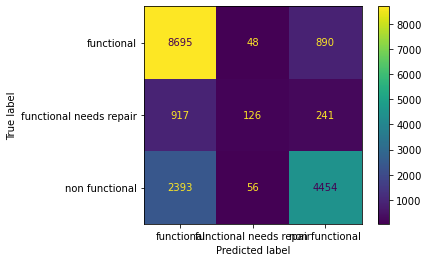

In [63]:
plot_confusion_matrix(final_smote, X_test, y_test);

In [ ]:
result = permutation_importance(final_smote, X_test, y_test)

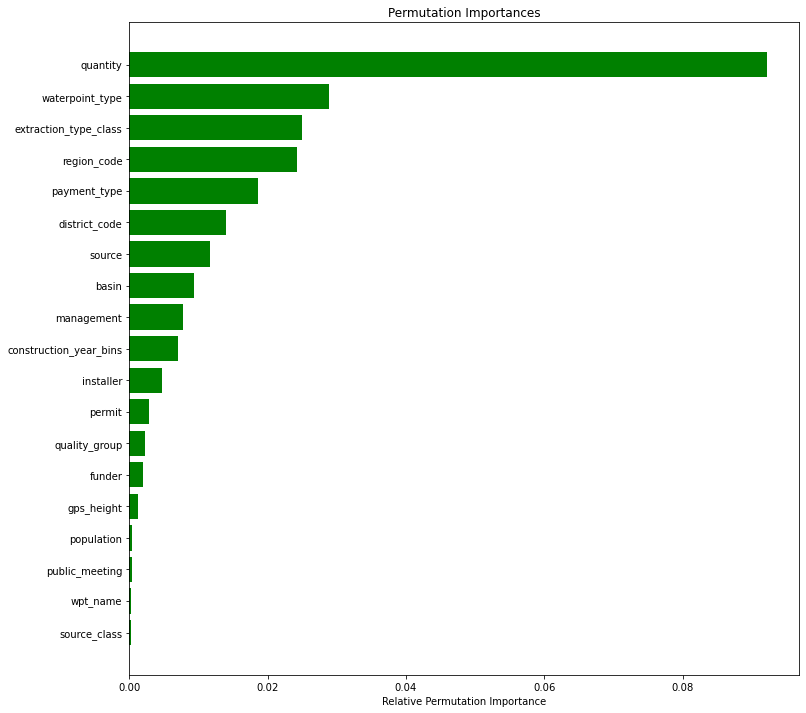

In [ ]:
Permutation_names = list(X.columns)
Permutations = abs(result.importances_mean)
indices = np.argsort(Permutations)
plt.figure(figsize=(12,12))
plt.title('Permutation Importances')
plt.barh(range(len(indices)), Permutations[indices], color= 'g')
plt.yticks(range(len(indices)), [Permutation_names[i] for i in indices])
plt.xlabel('Relative Permutation Importance')
plt.savefig('perm.png')
plt.show()